## Front Matter
Module name and number: CASA0013 - Introduction to Programming for Spatial Analysts
\
Student ID: 19113428
\
Title: To the Chief Executive of an Investment Company - Opportunities and Risks arising from Covid-19
\
Word Count: 2427
\
Github Link: https://github.com/wingochau/i2p_CW.git

# 1: Reproducible Analysis

## 1.1: Packages

In [1]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
import seaborn as sns
import geopandas as gpd
import scipy.stats as ss
import matplotlib.cm as cm
import matplotlib

In [2]:
import numpy as np
np.random.seed(12345789) # For reproducibility
import random 
random.seed(123456789) # For reproducibility

## 1.2: Read files

In [3]:
#read files
local_path  = os.path.join('listings.csv.gz')
remote_path = 'http://data.insideairbnb.com/united-kingdom/england/london/2020-11-06/data/listings.csv.gz'
url= 'http://data.insideairbnb.com/united-kingdom/england/london/2020-11-06/data/listings.csv.gz'

if os.path.exists(local_path):
    df = pd.read_csv(local_path, compression='gzip', low_memory=False)
else:
    df = pd.read_csv(remote_path, compression='gzip', low_memory=False)
    df.to_csv(local_path, compression='gzip')

print("Full data set shape is: " + ' by '.join(str(i) for i in df.shape))

Full data set shape is: 76984 by 74


In [4]:
#Set a sample
sample = df.sample(frac=0.1)
print("Sample data set shape is: " + ', '.join(str(i) for i in sample.shape))
sample.describe()

Sample data set shape is: 7698, 74


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.698000e+03,7.698000e+03,7.698000e+03,7698.000000,7698.000000,0.0,7698.000000,7698.000000,7698.000000,0.0,...,5359.000000,5363.000000,5359.000000,5359.000000,0.0,7698.000000,7698.000000,7698.000000,7698.000000,5550.000000
mean,2.559610e+07,2.020111e+13,9.453832e+07,22.203819,22.203819,NaN,51.510249,-0.128654,3.075344,NaN,...,9.661691,9.683200,9.564471,9.302295,NaN,18.669525,16.139257,1.974669,0.032736,0.654137
std,1.316050e+07,0.000000e+00,1.002186e+08,119.781323,119.781323,NaN,0.047306,0.095012,1.937248,NaN,...,0.913550,0.876648,0.825756,1.059122,NaN,95.219054,93.237539,13.105473,0.460433,0.929165
min,2.512300e+04,2.020111e+13,4.775000e+03,0.000000,0.000000,NaN,51.283370,-0.484930,1.000000,NaN,...,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.517957e+07,2.020111e+13,1.568120e+07,1.000000,1.000000,NaN,51.484607,-0.189537,2.000000,NaN,...,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.110000
50%,2.564122e+07,2.020111e+13,4.922200e+07,1.000000,1.000000,NaN,51.514090,-0.127760,2.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.000000,1.000000,0.000000,0.340000
75%,3.745318e+07,2.020111e+13,1.530581e+08,3.000000,3.000000,NaN,51.539648,-0.069153,4.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,3.000000,1.000000,1.000000,0.000000,0.830000
max,4.625469e+07,2.020111e+13,3.744656e+08,1105.000000,1105.000000,NaN,51.671810,0.288570,16.000000,NaN,...,10.000000,10.000000,10.000000,10.000000,NaN,878.000000,877.000000,249.000000,18.000000,18.700000


In [5]:
#Understanding the columns
sample.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'calen

In [6]:
list(df.columns.values)

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30',
 'availa

In [7]:
#Saving file locally
path = os.path.join('data','raw')
fn   = url.split('/')[-1]
print(f"Writing to: {fn}")

Writing to: listings.csv.gz


In [8]:
if not os.path.exists(path):
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)
    
df.to_csv(os.path.join(path,fn), index=False)
print("Done.")

Done.


In [9]:
#Resetting the dataframe & reselecting the needed columns

cols= ['id', 'name','host_id','host_name', 'host_location',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood',
       'latitude', 'longitude', 'property_type', 'room_type',
       'price', 'minimum_nights', 'maximum_nights',
       'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']

In [10]:
del(df)
df = pd.read_csv(os.path.join(path,fn), low_memory=False, usecols=cols, nrows=10000)
print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")

Data frame is 10,000 x 36


In [11]:
#testing df

df.sample(4, random_state=42)

,id,name,host_id,host_name,host_location,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
6252,5723725.0,"Double room private terrace, London",20548619.0,Guillermo,"Zaragoza, Aragon, Spain",f,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,f,1.0,0.0,1.0,0.0,NaN
4684,4266422.0,Spacious 1 bedroom flat overlooking Clapham Co...,22147627.0,Lucy,"London, United Kingdom",f,Battersea,1.0,1.0,"London, United Kingdom",...,10.0,10.0,10.0,9.0,f,1.0,1.0,0.0,0.0,0.30
1731,1041523.0,Beautifully Spacious Property in Islington,5733781.0,Tomas,London,f,LB of Islington,1.0,1.0,"Greater London, England, United Kingdom",...,10.0,9.0,10.0,10.0,f,1.0,1.0,0.0,0.0,0.74
4742,4332039.0,Single bedroom in old East London,14148041.0,Richard,"London, UK",f,LB of Newham,4.0,4.0,"London, England, United Kingdom",...,10.0,10.0,9.0,10.0,f,4.0,0.0,4.0,0.0,6.26


## 1.3: Data Cleaning

### 1.3.1: Dealing with NaNs & Null data

In [12]:
#Removing problematic coordinates

df.drop(df[((df.latitude.isna())|(df.longitude.isna()))].index, axis=0, inplace=True)
df.drop(df[((df.latitude < 40)|(df.longitude > 1))].index, axis=0, inplace=True)
df.drop(df[((df.review_scores_rating.isna()))].index, axis=0, inplace=True)

In [13]:
#Identifying problematic rows
df[df.id.isna()][['id','name','host_id','host_name']]

,id,name,host_id,host_name


In [14]:
#Dropping the problematic row
df.drop(df[df.id.isna()].index.values, axis=0, inplace=True)

In [15]:
#Counting Null by column
df.isnull().sum(axis=0).sort_values(ascending=False)[:12]

neighbourhood                  1963
host_neighbourhood             1333
review_scores_checkin            24
review_scores_accuracy           20
review_scores_cleanliness        19
review_scores_location           19
review_scores_value              17
review_scores_communication      15
name                              1
host_listings_count               0
property_type                     0
longitude                         0
dtype: int64

In [16]:
#Removing the most significant columns
df.drop(columns=['neighbourhood' , 'review_scores_checkin' , 'review_scores_accuracy' , 'review_scores_cleanliness' , 'review_scores_location', 'review_scores_value', 'review_scores_communication'], inplace=True)

<class 'pandas.core.series.Series'>


<AxesSubplot:ylabel='Frequency'>

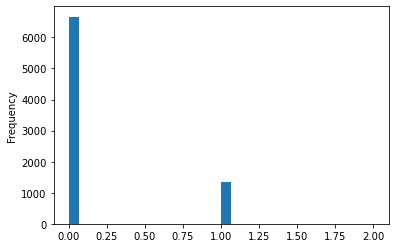

In [17]:
#Observing problematic columns
probs = df.isnull().sum(axis=1)
print(type(probs))
probs.plot.hist(bins=30)

In [18]:
#As being ones that are most likely to be problematic, in here I choose to use values greater than 4
df.drop(probs[probs > 4].index, inplace=True)
print(f"Have reduced data frame to: {df.shape[0]} rows and {df.shape[1]} columns")

Have reduced data frame to: 7999 rows and 29 columns


In [19]:
df.head(4)

,id,name,host_id,host_name,host_location,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,latitude,...,availability_90,availability_365,number_of_reviews,review_scores_rating,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11551.0,Arty and Bright London Apartment in Zone 2,43039.0,Adriano,"London, England, United Kingdom",f,Brixton,3.0,3.0,51.46225,...,4.0,279.0,192,91.0,t,2.0,2.0,0.0,0.0,1.48
1,13913.0,Holiday London DB Room Let-on going,54730.0,Alina,"London, England, United Kingdom",f,LB of Islington,3.0,3.0,51.56802,...,90.0,365.0,21,97.0,f,2.0,1.0,1.0,0.0,0.17
2,15400.0,Bright Chelsea Apartment. Chelsea!,60302.0,Philippa,"Kensington, England, United Kingdom",f,Chelsea,1.0,1.0,51.48796,...,50.0,150.0,89,96.0,t,1.0,1.0,0.0,0.0,0.67
3,17402.0,Superb 3-Bed/2 Bath & Wifi: Trendy W1,67564.0,Liz,"London, England, United Kingdom",t,Fitzrovia,18.0,18.0,51.52195,...,85.0,330.0,42,94.0,f,15.0,15.0,0.0,0.0,0.36


### 1.3.2: Fixing boolean values

In [20]:
bools = ['host_is_superhost', 'instant_bookable', 'has_availability']
         
df.sample(4, random_state=43)[bools]

,host_is_superhost,instant_bookable,has_availability
9106,f,f,t
2204,f,f,t
2044,f,f,t
2941,f,f,t


In [21]:
# This approach requires us to map 't' and 'f'
# to 'True' and 'False'
map = {'t':True, 'f':False}
for b in bools:
    print(f"Converting {b}")
    df[b] = df[b].replace(map).astype('bool')

Converting host_is_superhost
Converting instant_bookable
Converting has_availability


### 1.3.3: Fixing categories

In [22]:
cats = ['property_type','room_type']
df.sample(4, random_state=43)[cats]

,property_type,room_type
9106,Private room in apartment,Private room
2204,Entire apartment,Entire home/apt
2044,Entire apartment,Entire home/apt
2941,Entire apartment,Entire home/apt


In [23]:
df[cats[0]].value_counts()

Entire apartment                      3423
Private room in apartment             1870
Private room in house                 1223
Entire house                           568
Private room in townhouse              283
Entire townhouse                       154
Entire loft                             72
Private room in bed and breakfast       62
Private room in condominium             46
Private room in loft                    46
Entire condominium                      45
Entire serviced apartment               20
Entire guest suite                      20
Room in serviced apartment              18
Private room in guest suite             17
Shared room in apartment                17
Room in boutique hotel                  16
Private room                            12
Entire guesthouse                       11
Private room in guesthouse               8
Room in bed and breakfast                7
Shared room in hostel                    7
Shared room in house                     7
Shared room

In [24]:
df[cats[1]].value_counts()

Entire home/apt    4337
Private room       3596
Shared room          40
Hotel room           26
Name: room_type, dtype: int64

In [25]:
#Getting the needed catergories only
for c in cats:
    print(f"Converting {c}")
    df[c] = df[c].astype('category')

Converting property_type
Converting room_type


In [26]:
print(df[cats[1]].cat.categories.values)

['Entire home/apt' 'Hotel room' 'Private room' 'Shared room']


In [27]:
df.sample(6, random_state=43)[cats]

,property_type,room_type
9106,Private room in apartment,Private room
2204,Entire apartment,Entire home/apt
2044,Entire apartment,Entire home/apt
2941,Entire apartment,Entire home/apt
2913,Private room in apartment,Private room
8442,Entire apartment,Entire home/apt


### 1.3.4: Fixing strings

In [28]:
#Fixing prices from $ to a float value

money= ['price']

for m in money:
    print(f"Converting {m}")
    df[m] = df[m].str.replace('$','').str.replace(',','').astype('float')

Converting price


In [29]:
df.sample(5, random_state=42)[money]

,price
4710,137.0
3024,161.0
4310,28.0
8012,60.0
9401,115.0


### 1.3.5: Fixing integers

In [30]:
ints  = ['id','host_id','host_listings_count','host_total_listings_count',
         'minimum_nights','maximum_nights','availability_60', 'availability_90', 'availability_365',
         'number_of_reviews',
         'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes',
         'calculated_host_listings_count_private_rooms',
         'calculated_host_listings_count_shared_rooms']
for i in ints:
    print(f"Converting {i}")
    try:
        df[i] = df[i].astype('float').astype('int')
    except ValueError as e:
        print("\tConverting to unsigned 16-bit integer.")
        df[i] = df[i].astype('float').astype(pd.UInt16Dtype())

Converting id
Converting host_id
Converting host_listings_count
Converting host_total_listings_count
Converting minimum_nights
Converting maximum_nights
Converting availability_60
Converting availability_90
Converting availability_365
Converting number_of_reviews
Converting calculated_host_listings_count
Converting calculated_host_listings_count_entire_homes
Converting calculated_host_listings_count_private_rooms
Converting calculated_host_listings_count_shared_rooms


In [31]:
df.id.isna().value_counts()

False    7999
Name: id, dtype: int64

### 1.3.6: Validation

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7999 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   id                                            7999 non-null   int64   
 1   name                                          7998 non-null   object  
 2   host_id                                       7999 non-null   int64   
 3   host_name                                     7999 non-null   object  
 4   host_location                                 7999 non-null   object  
 5   host_is_superhost                             7999 non-null   bool    
 6   host_neighbourhood                            6666 non-null   object  
 7   host_listings_count                           7999 non-null   int64   
 8   host_total_listings_count                     7999 non-null   int64   
 9   latitude                                      7999 n

In [33]:
df.describe()

,id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,7.999000e+03,7.999000e+03,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7.999000e+03,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,4.174807e+06,1.416493e+07,4.074509,4.074509,51.511432,-0.128843,99.442180,6.348669,1.912944e+05,10.479685,22.965996,37.119015,149.955744,47.605326,93.770971,3.749344,2.569446,1.112139,0.034879,0.652312
std,2.584143e+06,1.470415e+07,27.161087,27.161087,0.045558,0.085443,282.209311,29.856258,1.262685e+07,13.288828,26.379961,39.486978,155.787939,71.023019,7.189139,22.300995,21.898694,3.757370,0.550440,0.915482
min,1.155100e+04,6.821000e+03,0.000000,0.000000,51.297330,-0.479620,12.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.714094e+06,3.011249e+06,1.000000,1.000000,51.482900,-0.189325,45.000000,2.000000,3.800000e+01,0.000000,0.000000,0.000000,0.000000,6.000000,91.000000,1.000000,0.000000,0.000000,0.000000,0.100000
50%,4.272878e+06,9.570295e+06,1.000000,1.000000,51.516820,-0.119790,75.000000,2.000000,1.125000e+03,0.000000,4.000000,19.000000,89.000000,21.000000,96.000000,1.000000,1.000000,1.000000,0.000000,0.320000
75%,6.592968e+06,2.252793e+07,2.000000,2.000000,51.542310,-0.071450,119.000000,4.000000,1.125000e+03,28.000000,57.000000,87.000000,340.000000,58.000000,98.000000,2.000000,1.000000,1.000000,0.000000,0.830000
max,8.376549e+06,3.040751e+08,1105.000000,1105.000000,51.671870,0.238150,16798.000000,1124.000000,1.000000e+09,30.000000,60.000000,90.000000,365.000000,813.000000,100.000000,878.000000,877.000000,249.000000,11.000000,12.770000


In [34]:
df[['price','availability_30', 'number_of_reviews', 'review_scores_rating']].describe(percentiles=[0.20, 0.80])

,price,availability_30,number_of_reviews,review_scores_rating
count,7999.000000,7999.000000,7999.000000,7999.000000
mean,99.442180,10.479685,47.605326,93.770971
std,282.209311,13.288828,71.023019,7.189139
min,12.000000,0.000000,1.000000,20.000000
20%,40.000000,0.000000,4.000000,90.000000
50%,75.000000,0.000000,21.000000,96.000000
80%,130.000000,29.000000,73.000000,99.000000
max,16798.000000,30.000000,813.000000,100.000000


In [35]:
print(f"The mean of price is {df.price.mean():0.2f}")
print(f"The median of price is {df.price.median():0.2f}")

print(f"The mean of availability in 30 days is {df.availability_30.mean():0.2f}")
print(f"The median of availability in 30 days is {df.availability_30.median():0.2f}")

print(f"The mean of the number of reviews is {df.number_of_reviews.mean():0.2f}")
print(f"The median of the number of reviews is {df.number_of_reviews.median():0.2f}")

print(f"The mean of review scores is {df.review_scores_rating.mean():0.2f}")
print(f"The median of review scores is {df.review_scores_rating.median():0.2f}")


The mean of price is 99.44
The median of price is 75.00
The mean of availability in 30 days is 10.48
The median of availability in 30 days is 0.00
The mean of the number of reviews is 47.61
The median of the number of reviews is 21.00
The mean of review scores is 93.77
The median of review scores is 96.00


### 1.3.7: Saving cleaned data

In [36]:
path = os.path.join('data','clean')

if not os.path.exists(path):
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)
    
df.to_csv(os.path.join(path,fn), index=False)
print("Done.")

Done.


## 1.4: Column Selection

### 1.4.1: Selecting the needed columns for analysis

In [37]:
df.groupby('room_type')['property_type'].value_counts()

room_type        property_type                     
Entire home/apt  Entire apartment                      3423
                 Entire house                           568
                 Entire townhouse                       154
                 Entire loft                             72
                 Entire condominium                      45
                 Entire guest suite                      20
                 Entire serviced apartment               20
                 Entire guesthouse                       11
                 Boat                                     6
                 Tiny house                               4
                 Entire bungalow                          3
                 Entire cottage                           3
                 Camper/RV                                2
                 Entire cabin                             2
                 Houseboat                                2
                 Entire place                   

In [38]:
df.groupby('availability_30')['room_type'].value_counts()

#Showing that entire home/apt is more worth to invest due to high short term demand

availability_30  room_type      
0.0              Entire home/apt    2740
                 Private room       1709
                 Shared room          18
                 Hotel room           13
1.0              Entire home/apt      66
                                    ... 
29.0             Shared room           2
30.0             Private room        752
                 Entire home/apt     403
                 Shared room          15
                 Hotel room            6
Name: room_type, Length: 76, dtype: int64

In [39]:
#Review Scores (RS) with two main room types
RSen = df[(df.room_type=='Entire home/apt') & (df.review_scores_rating==100)]
RSpri = df[(df.room_type=='Private room') & (df.review_scores_rating==100)]

print(f"Selected {RSen.shape[0]} rows")
print(f"Selected {RSpri.shape[0]} rows")

Selected 762 rows
Selected 622 rows


### 1.4.2: Finding the highest (100) and lowest (20) rating scores

In [40]:
#Lowest
lowrs = df[df.review_scores_rating==df.review_scores_rating.min()][['price','property_type','room_type', 'availability_30', 'review_scores_rating']]
lowrs

,price,property_type,room_type,availability_30,review_scores_rating
1557,57.0,Entire apartment,Entire home/apt,0.0,20.0
5696,70.0,Shared room in apartment,Shared room,30.0,20.0
6530,45.0,Private room in house,Private room,30.0,20.0
7212,27.0,Private room in house,Private room,30.0,20.0
8087,23.0,Private room in apartment,Private room,0.0,20.0
8342,90.0,Entire apartment,Entire home/apt,0.0,20.0
8865,39.0,Private room in house,Private room,0.0,20.0
9043,25.0,Private room in house,Private room,0.0,20.0


In [41]:
#Highest
highrs = df[df.review_scores_rating==df.review_scores_rating.max()][['price','property_type','room_type', 'availability_30', 'review_scores_rating']]

highrs

,price,property_type,room_type,availability_30,review_scores_rating
16,42.0,Private room in apartment,Private room,29.0,100.0
39,56.0,Entire condominium,Entire home/apt,0.0,100.0
65,42.0,Private room in apartment,Private room,30.0,100.0
73,133.0,Entire apartment,Entire home/apt,0.0,100.0
85,40.0,Private room,Private room,30.0,100.0
...,...,...,...,...,...
9980,123.0,Entire apartment,Entire home/apt,0.0,100.0
9981,190.0,Entire townhouse,Entire home/apt,23.0,100.0
9985,200.0,Entire house,Entire home/apt,0.0,100.0
9989,70.0,Entire apartment,Entire home/apt,8.0,100.0


In [42]:
highrs['room_type'].value_counts()

Entire home/apt    762
Private room       622
Shared room          5
Hotel room           4
Name: room_type, dtype: int64

In [43]:
lowrs['room_type'].value_counts()

Private room       5
Entire home/apt    2
Shared room        1
Hotel room         0
Name: room_type, dtype: int64

In [44]:
#From the lowest we can see that private room is the majority. 
#And in the highest, Entire home/apt and private room hold the most proportion, 762 and 622 respectively.
#However, due to the lowest result, investing in entire home would be less risky (5/8= 62.5% of having 20 RS) 
#to have a low rating score relatively.

## 1.5: Descriptive Statistics

### 1.5.1: Boxplot

Text(0.5, -0.3, '$\\bf{[Figure 1]}$')

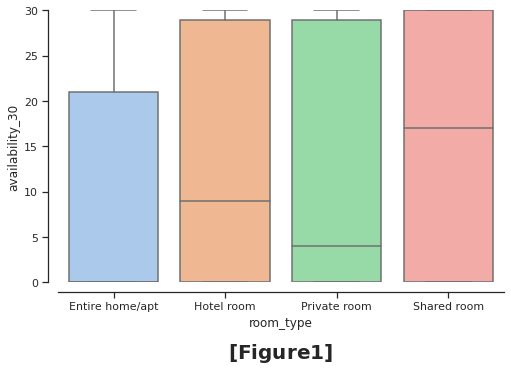

In [45]:
sns.set_style('whitegrid')
sns.set_theme(style="ticks", palette="pastel")
f,ax = plt.subplots(figsize=(8,5))
sns.boxplot(y=df.availability_30, x=df.room_type)
sns.despine(offset=10)
ax.set_ylim([0,30])
plt.title(r"$\bf{" + '[Figure 1]' + "}$", y=-0.3, fontsize= 20)

### 1.5.2: Histogram

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, -0.2, '$\\bf{[Figure 2]}$')

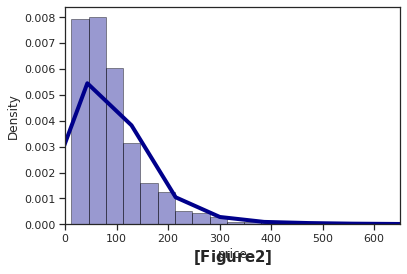

In [46]:
sns.distplot(df['price'], hist=True, kde=True, 
             bins=500, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xlim(0, 650)
plt.title(r"$\bf{" + '[Figure 2]' + "}$", y=-0.2, fontsize= 15)

## 1.6 Spatial Analysis

### 1.6.1: Loading GeoData

In [47]:
#whole UK map
msoas = gpd.read_file('https://github.com/wingochau/i2p_CW/raw/main/Middle_Layer_Super_Output_Areas__December_2011__EW_BGC_V2-shp.zip')

In [48]:
#London boroughs
boros = gpd.read_file('https://github.com/wingochau/i2p_CW/raw/main/Boroughs.gpkg')

In [49]:
ldn = gpd.GeoDataFrame(gpd.GeoSeries(data=boros.unary_union, crs='epsg:27700')).rename(columns={0:'original'})

# buffer the boundary by 250m
ldn['geometry'] = ldn.original.buffer(250)
ldn = ldn.set_geometry('geometry')

In [50]:
#merge two together
ldn_msoas = gpd.sjoin(msoas, ldn, op='within');

In [51]:
#del MSOA for memory
del(msoas)

In [52]:
#Extracting string
ldn_msoas['Borough'] = ldn_msoas.MSOA11NM.str.replace(r' \d+$','',regex=True)

In [53]:
#Adding MSOA name using merge
msoa_nms = pd.read_csv('https://github.com/wingochau/i2p_CW/raw/main/MSOA-Names-1.8.csv.gz', compression='gzip')

In [54]:
#Merge with London MSOA
msoas = pd.merge(ldn_msoas, msoa_nms, left_on='MSOA11CD', right_on='msoa11cd', how='inner')

In [55]:
#Cleaning unnecessary columns
to_drop = ['MSOA11NMW','LONG','LAT','Shape__Are','Shape__Len','index_right',
           'original','msoa11cd','msoa11nm','msoa11nmw','Laname','msoa11hclnmw']
msoas.drop(columns=to_drop, inplace=True)

### 1.6.2: Coverting Airbnb data to GeoPandas

In [56]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude, crs='epsg:4326'))
gdf = gdf.to_crs('epsg:27700')

In [57]:
#Adding Local Authority names
gdf_la = gpd.sjoin(gdf, boros, op='within', how='left')

#Groupping LA name in one column
la_data = gdf_la.groupby(['NAME'])
print(type(la_data))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


In [58]:
#Tidying up unnecessary data
gdf_la.drop(columns=['index_right','HECTARES','NONLD_AREA','ONS_INNER'], inplace=True)
gdf_la.NAME.unique()

array(['Lambeth', 'Islington', 'Kensington and Chelsea', 'Westminster',
       'Barnet', 'Hounslow', 'Richmond upon Thames', 'Haringey',
       'Hackney', 'Southwark', 'Tower Hamlets', 'Hammersmith and Fulham',
       'Waltham Forest', 'Brent', 'Camden', 'Croydon', 'Merton',
       'Wandsworth', 'Bromley', 'Greenwich', 'Lewisham', 'Ealing',
       'Enfield', 'Newham', 'Barking and Dagenham', 'Hillingdon',
       'Harrow', 'Redbridge', 'Kingston upon Thames', 'Havering',
       'Bexley', 'City of London', 'Sutton'], dtype=object)

In [59]:
#and dropping problematic data
gdf_la.drop(index=gdf[gdf_la.NAME.isna()].index, axis=1, inplace=True)
gdf_la.drop(index=gdf[gdf_la.review_scores_rating.isna()].index, axis=1, inplace=True)
gdf_la.dropna(axis=0, how='any')
print(gdf_la.shape)

(7999, 32)


In [60]:
gdf.dropna(axis=0, how='any')
print(gdf_la.shape)

(7999, 32)


In [61]:
#Mapping borough names
mapping = {}
for b in ['Enfield','Waltham Forest','Redbridge','Barking and Dagenham','Havering','Greenwich','Bexley']:
    mapping[b]='Outer East and North East'
for b in ['Haringey','Islington','Hackney','Tower Hamlets','Newham','Lambeth','Southwark','Lewisham']:
    mapping[b]='Inner East'
for b in ['Bromley','Croydon','Sutton','Merton','Kingston upon Thames']:
    mapping[b]='Outer South'
for b in ['Wandsworth','Kensington and Chelsea','Hammersmith and Fulham','Westminster','Camden']:
    mapping[b]='Inner West'
for b in ['Richmond upon Thames','Hounslow','Ealing','Hillingdon','Brent','Harrow','Barnet','City of London']:
    mapping[b]='Outer West and North West'

In [62]:
#Groupping borough with aggregrated review scores

la_data3 = gdf_la.set_index('NAME').groupby([mapping,'room_type']).agg(
    {'review_scores_rating':['mean','median']}
).reset_index()

In [63]:
#Removing NaN
la_data3_clean = la_data3.dropna(axis=0, how='any')

In [64]:
#Renaming
la_data3_clean.columns = la_data3_clean.columns.droplevel(0)
cols = la_data3_clean.columns.values
cols[0]  = 'area'
cols[1]  = 'room_type'
la_data3_clean.columns = cols

In [65]:
la_data3_clean.sample(3)

,area,room_type,mean,median
1,Inner East,Hotel room,94.333333,96.0
9,Outer East and North East,Hotel room,93.750000,95.0
12,Outer South,Entire home/apt,93.025862,95.0


### 1.6.3: Review Scores analysis by areas

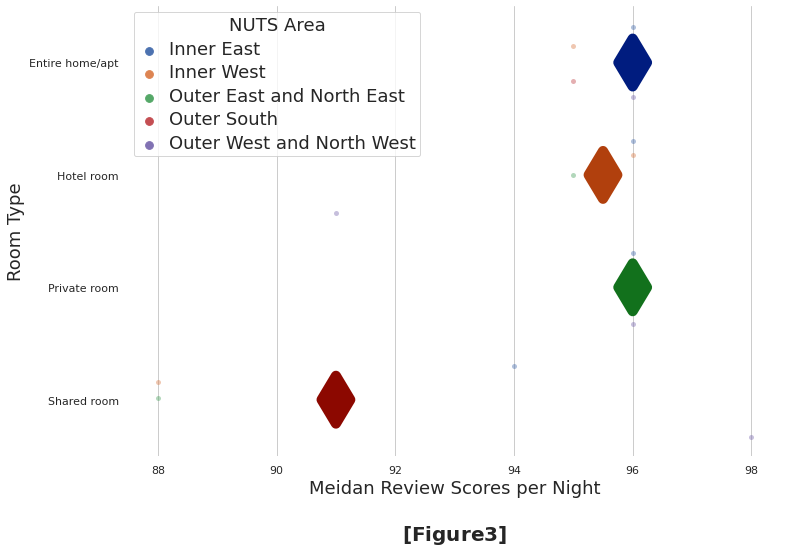

In [66]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

g = sns.stripplot(x="median", y="room_type", hue="area",
              data=la_data3_clean, dodge=True, alpha=.45, zorder=1)
g.legend_.set_title('NUTS Area')
plt.setp(ax.get_legend().get_texts(), fontsize='18')
plt.setp(ax.get_legend().get_title(), fontsize='18')

sns.pointplot(x="median", y="room_type",
              data=la_data3_clean.groupby('room_type').agg('median').reset_index(), 
              join=False, palette="dark",
              markers="d", scale=5, ci=None)

# See if you can work out how to set the plot x- and y-labels...
plt.xlabel('Meidan Review Scores per Night', fontsize=18)
plt.ylabel('Room Type', fontsize=18)
plt.title(r"$\bf{" + '[Figure 3]' + "}$", y=-0.2, fontsize= 20);

### 1.6.4: Spatial analysis

In [67]:
LA = 'Greenwich'

#### 1.6.4.1: Spatial join

In [68]:
msoadf  = gpd.sjoin(
            gdf_la[gdf_la.NAME==LA].reset_index(), 
            msoas[msoas.Borough==LA], op='within')

In [69]:
msoagrdf = msoadf.groupby('MSOA11NM').agg({'review_scores_rating':['median','count']}).reset_index()

In [70]:
#level 1 as columns
msoagrdf.columns = msoagrdf.columns.get_level_values(1)

In [71]:
#and to fix missing column names
msoagrdf.rename(columns={'':'MSOA11NM', 'count':'listings'}, inplace=True)

#### 1.6.4.2: Join on indexes

In [72]:
#letting the Greenwich area to join with the msoas data
msoa_gdf = msoagrdf.set_index('MSOA11NM').join(
                msoas[msoas.Borough==LA].set_index('MSOA11NM'), 
                rsuffix='_r')

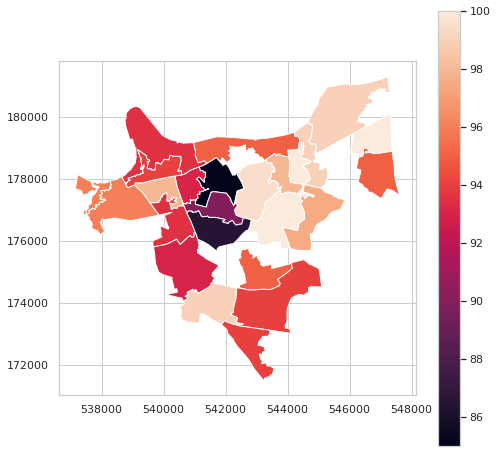

In [73]:
msoa_gdf = msoa_gdf.set_geometry('geometry')
msoa_gdf.plot(column='median', legend=True, figsize=(8,8));

In [74]:
loc = matplotlib.get_cachedir()
!ls {loc}

fontlist-v330.json


In [75]:
fonts = !cat {loc + '/fontlist-v330.json'}
fonts = set(list(filter(lambda x:'"name"' in x, fonts)))
fonts = [x.replace('      "name": "','').replace('",','') for x in fonts]

In [76]:
tfont = {'fontname':'Liberation Sans Narrow', 'horizontalalignment':'left'}

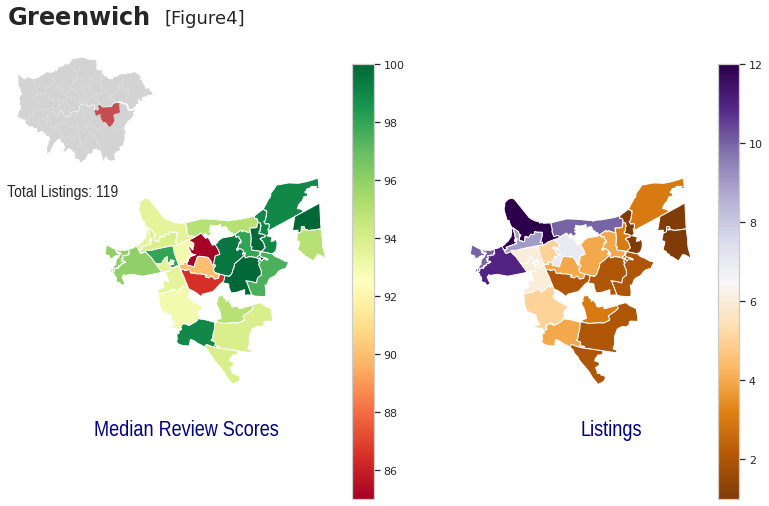

In [77]:
f,axes = plt.subplots(1,2,figsize=(12,8))

msoa_gdf.plot(column='median', ax=axes[0], legend=True, cmap='RdYlGn')
msoa_gdf.copy().plot(column='listings', ax=axes[1], legend=True, cmap='PuOr')
for ax in axes:
    ax.axis('off')
    
ax2 = f.add_axes([0.015, 0.7, 0.2, 0.2])
boros.plot(facecolor='lightgrey', edgecolor='None', ax=ax2)
boros[boros.NAME==LA].plot(facecolor='r', edgecolor='r', hatch='///', ax=ax2)
ax2.axis('off')

f.suptitle(r"$\bf{" + LA + "}$", x=0.025, ha='left', size=24, **tfont)
axes[0].set_title('Median Review Scores', size=22, **tfont, loc='left', y=-0.2, color='navy')
axes[1].set_title('Listings', size=22, **tfont, loc='center', y=-0.2, color='navy')

plt.title('[Figure4]', x=1.3, y=1.2, fontsize= 18)
plt.figtext(x=0.025, y=0.65, s=f"Total Listings: {msoa_gdf.listings.sum():,.0f}", size=17, **tfont);

# 2： Executive Briefing

## 2.1: Executive Summary

With the impact of the COVID-19 since 2020, it caused inconvenience but also derived several investment opportunities. The coronavirus limits human activities, people spend times mostly with their family in the same area. However, it creates different issues such as a high probability of arguing with family and the threat of cross infection. Therefore, the demand for extra spacing has derived during this period of time. Although the entire economy is experiencing a recession and rental market is seen as to be silent, the review of evidence and data analysis from Airbnb data in London prove that it is still a great moment to invest the Airbnb's listings in London over the pandemic.

### 2.1.1: Recommendations

The investment approach is recommended to be "stocking-up" the portfolio, instead of making short-term cash inflow. Economic recession is timing for buying cheaper securities. Based on the data analysis, it revealed that the room type with the entire home/apartment in the East of London is the most needed property. Among with inner and outer East London, the recommendation is to invest in Greenwich. It is a place where surrounds with core areas such as Canary Wharf and London Bridge. In light of the "stock-up" perspective, it provides high value appreciation and greater performance in terms of Airbnb's users' review scores. This investment in Airbnb London would enhance the investment portfolio with lower costs to buy in during the pandemic, and greater outcomes once the economy is recovered.

## 2.2: Review of Evidence

The COVID-19 has been affecting human activities throughout the entire 2020. For the people who unfortunately are or potentially infected, under the current UK restriction, they are recommended to conduct a self-isolation (GOV.UK, 2021b). Due to the avoidance of cross infection, it creates the needs of alternative accommodation. In the following section, it is going to demonstrate the potentials and possible risks on investing Airbnb's listings during the pandemic.

### 2.2.1: Investment Risks

First of all, the current renting market is relatively weak. Due to the impact of the coronavirus, it is experiencing a huge reduction in tourism. Comparing to the same rent in last year, the average rent in London declined by 4.2% with approximately £1,800 per month and dropped 8.4% in inner London (Ivey, 2020). Consequently, it indicated that renting a property in London might suffer a lower price in comparison to previous years.

Moreover, another investment risk is that Airbnb's hosts tend to be more risk-averse at the moment. According to The Guardian (Collinson, 2020), Airbnb's owners in London are moving their property onto the long-term rental market. It reflected that the entire market reaction tends to be passive, Airbnb's property owners in London lacked the confidence to thrive in the short run. As the market is now taking the long-term approach such as longer renting period per user, this timing to invest in might be a high risk decision.

However, these potential investment risks could be seen as chances. These two risks are defined as systematic risks in finance terms, which is determined by the market but not the business itself. During the weak economy, in other words, it is relatively cheaper to purchase a property. Also, when Airbnb's hosts are no longer providing short-term rental, it creates a demand correspondingly. As a result, it is recommended that this period of time is suitable to "stock-up" the investment portfolio.

The sections below are going to indicate the opportunities and its rationale for the rental industry itself.

### 2.2.2: Investment Opportunities

The first investment opportunity under the pandemic would be providing a listings where is lower infection rate. For the current situation of Covid-19 in the UK, there was nearly 60,000 confirmed daily cases recorded on 4 January 2021 and the new variant of virus was found in London (GOV.UK, 2021a; Ross and Spence, 2020). Consequently, the demand for "safe bubble" is expected to grow in the following months. According to the lower tier local authority watchlist (GOV.UK, 2020), the whole London is seen as Tier 4 which indicates that the COVID-19 rate by the local authority is more than 400 cases per a thousand of population. In which, the report demonstrated that the east of London recorded a relatively lower weekly case rate. The safer place is likely to provide attractiveness for Airbnb's users to choose to live under the current circumstances.

Looking more into a consumer behaviour perspective, under the impacts of the pandemic, it reveals that the second opportunity is the needs of spacing. Based on the sociological research, part of the interviewees showed that 51% of them have argued with family or people who live together over the coronavirus (Duffy, 2020). The lockdown policy could help to reduce human mobility by staying in their homes, meanwhile it creates arguments within a family. Thus, providing an extra spacing (Airbnb) for this group of people would be a potential business opportunity, while solving the problem of safety and mental quality.

## 2.3: Data Analysis

In this section, it is going to analyse the Airbnb data in London provided from InsideAirbnb up to November 2020, in order to provide the optimal listings type to invest.

### 2.3.1: The most popular room type in 30 days

After cleaning and processing the Airbnb data, Figure 1 showed that the entire home/apartment is the most needed room type on a 30 day basis. The selection of 30 days is because of the consideration of self-quarantine and the recovery of psychological issues. It assumes that the use of Airbnb's listings is for 14-21 days self-isolation or the short-term avoidance of family issues.

Comparing to other room types, the interquartile of entire home/apartment is relatively left-skewed. In which, it means that the majority of the rental transactions for this room type is ranged around 0 to 20 availability in 30 days. Thus, investing in an entire home/apartment is likely to have a high demand than other room types in the short-term. It consists of the evidence in the above sections, as the entire property provides high privacy, safety and spacing for users under the pandemic.

Text(0.5, -0.3, '$\\bf{[Figure 1]}$')

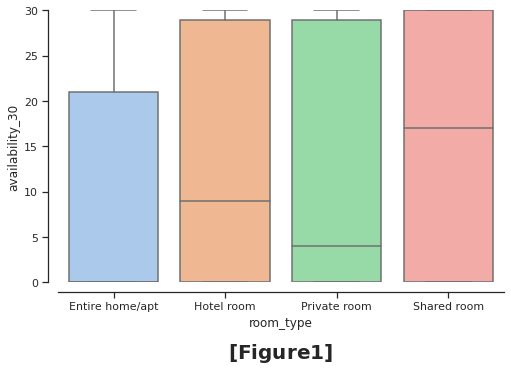

In [78]:
sns.set_style('whitegrid')
sns.set_theme(style="ticks", palette="pastel")
f,ax = plt.subplots(figsize=(8,5))
sns.boxplot(y=df.availability_30, x=df.room_type)
sns.despine(offset=10)
ax.set_ylim([0,30])
plt.title(r"$\bf{" + '[Figure 1]' + "}$", y=-0.3, fontsize= 20)

### 2.3.2: Rental prices in London Airbnb's listings

Figure 2 indicated the distribution of rental prices for Airbnb's listings in London, the trend of the prices is also left-skewed. It showed that prices were concentrated on around £100 per night and below £100 hold the largest proportion. The result explained the fact that the rental prices performed feebly in general over the year. If invested in the rental industry, it is unlikely to set a price above this range. In a monthly basis, the average rental income would be expected as £1,500 [W1] per month under the current market price. If this investment action is taken, it is required to have an additional cash flow to support the business until the economy in London is recovered. However, as mentioned above, this investment is mainly for "stocking-up" the portfolio and gaining market shares during the weak economy.

[W1] \
(£100/2)* 30 days= £1500

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, -0.2, '$\\bf{[Figure 2]}$')

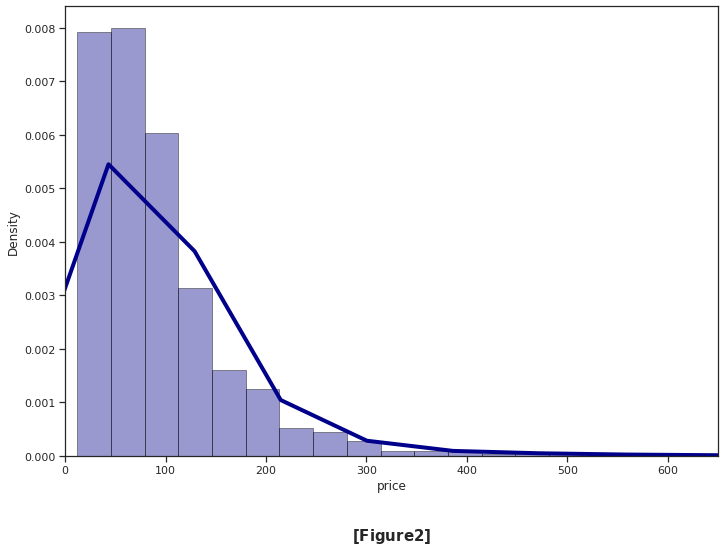

In [79]:
sns.distplot(df['price'], hist=True, kde=True, 
             bins=500, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xlim(0, 650)
plt.title(r"$\bf{" + '[Figure 2]' + "}$", y=-0.2, fontsize= 15)

### 2.3.3: The Review Scores of Room Types by Different Areas

Figure 3 provided an insight into review scores by different London areas. Referring to section 2.3.1, the entire home/apartment is the most needed room types. In this figure, we can see that this room type performed outstandingly in the inner East of London. Besides, another highest median review scores recorded from the private room was also found in the East of London (Outer East and North East). It concluded that if the investment is for the property in the East of London, it is most likely to have a high review score which is a median of 96 from Airbnb's users.

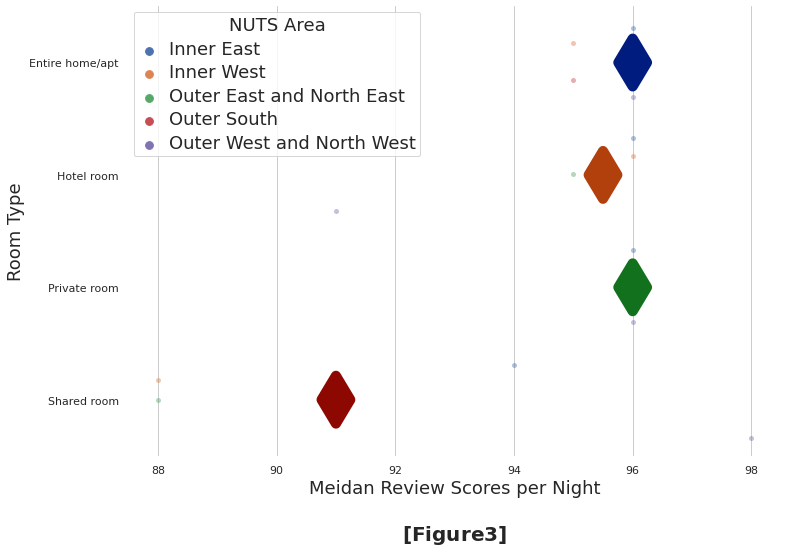

In [80]:
sns.set_theme(style="whitegrid")

f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

g = sns.stripplot(x="median", y="room_type", hue="area",
              data=la_data3_clean, dodge=True, alpha=.45, zorder=1)
g.legend_.set_title('NUTS Area')
plt.setp(ax.get_legend().get_texts(), fontsize='18')
plt.setp(ax.get_legend().get_title(), fontsize='18')

sns.pointplot(x="median", y="room_type",
              data=la_data3_clean.groupby('room_type').agg('median').reset_index(), 
              join=False, palette="dark",
              markers="d", scale=5, ci=None)

# See if you can work out how to set the plot x- and y-labels...
plt.xlabel('Meidan Review Scores per Night', fontsize=18)
plt.ylabel('Room Type', fontsize=18)
plt.title(r"$\bf{" + '[Figure 3]' + "}$", y=-0.2, fontsize= 20);

### 2.3.4: The Optimal Location for Investment

In here, we picked Greenwich as our target place to investigate. It is because it locates in East London, and Greenwich is a potential location to invest in as there is a new residential neighbourhood completed by O2 in 2020 (Bloomfield, 2020). This location provides us with an option to choose and its surrounds with core places such as Canary Wharf and London Bridge, a huge possibility for value appreciation.

Figure 4 demonstrated the amount of listings in Greenwich and the median review scores on a visualised map. There are 119 listings in Greenwich, in which the highest median review scores were focused on the east. By observing the amount of listings, it showed a low density of ownership in these areas with high review scores. It revealed a remarkable customer review for the listings in this area, investing in here is likely to have a better consumption and "re-purchasing effect".

As a result, the data analysis reflected that the investment is optimised when the property is bought in the east of Greenwich. Despite the market recession, a listings with entire home/apartment room type in this location has the highest possibility to obtain greater review scores and better value appreciation in the future comparing to other places.

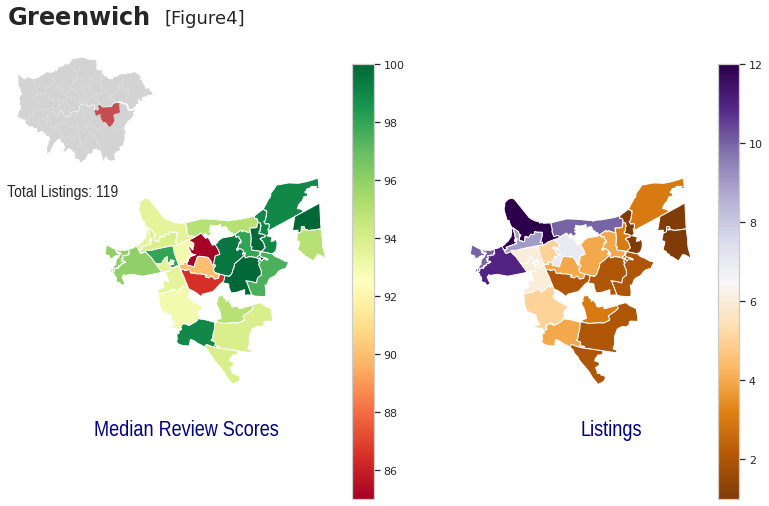

In [81]:
f,axes = plt.subplots(1,2,figsize=(12,8))

msoa_gdf.plot(column='median', ax=axes[0], legend=True, cmap='RdYlGn')
msoa_gdf.copy().plot(column='listings', ax=axes[1], legend=True, cmap='PuOr')
for ax in axes:
    ax.axis('off')
    
ax2 = f.add_axes([0.015, 0.7, 0.2, 0.2])
boros.plot(facecolor='lightgrey', edgecolor='None', ax=ax2)
boros[boros.NAME==LA].plot(facecolor='r', edgecolor='r', hatch='///', ax=ax2)
ax2.axis('off')

f.suptitle(r"$\bf{" + LA + "}$", x=0.025, ha='left', size=24, **tfont)
axes[0].set_title('Median Review Scores', size=22, **tfont, loc='left', y=-0.2, color='navy')
axes[1].set_title('Listings', size=22, **tfont, loc='center', y=-0.2, color='navy')

plt.title('[Figure4]', x=1.3, y=1.2, fontsize= 18)
plt.figtext(x=0.025, y=0.65, s=f"Total Listings: {msoa_gdf.listings.sum():,.0f}", size=17, **tfont);

## References

Bloomfield, R. (2020) ‘Why Greenwich Peninsula is one to watch: first high-rise neighbourhood at new 15,000-home waterside suburb set for completion in 2020 | Homes and Property’, Homes and Property, 18 February. Available at: https://www.homesandproperty.co.uk/property-news/buying/greenwich-peninsula-house-flat-london-a136786.html (Accessed: 5 January 2021).

Collinson, P. (2020) ‘Rents rise in England but slide in London as Covid-19 affects market | Money | The Guardian’, The Guardian, 16 July. Available at: https://www.theguardian.com/money/2020/jul/16/rents-rise-in-england-but-slide-in-london-as-covid-19-affects-market (Accessed: 5 January 2021).

Duffy, B. (2020) ‘Three ways people are reacting to coronavirus: “accepting”, “suffering” and “resisting”’, The Conversation, 29 April. Available at: https://theconversation.com/three-ways-people-are-reacting-to-coronavirus-accepting-suffering-and-resisting-137345 (Accessed: 4 January 2021).

GOV.UK (2020) London lower tier local authority watchlist - epidemiological charts. Available at: https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/948492/London_epidemiological_charts_2020-12-28.pdf (Accessed: 4 January 2021).

GOV.UK (2021a) Daily summary | Coronavirus in the UK. Available at: https://coronavirus.data.gov.uk/?_ga=2.212026972.994310312.1609779632-733400362.1599669809 (Accessed: 4 January 2021).

GOV.UK (2021b) When to self-isolate and what to do - Coronavirus (COVID-19) - NHS. Available at: https://www.nhs.uk/conditions/coronavirus-covid-19/self-isolation-and-treatment/when-to-self-isolate-and-what-to-do/ (Accessed: 4 January 2021).

Ivey, P. (2020) ‘Renting in London: average rents continue to fall as Airbnbs flood the long let market | Homes and Property’, Homes and Property, 14 August. Available at: https://www.homesandproperty.co.uk/property-news/renting/average-rent-in-london-falls-a139861.html (Accessed: 5 January 2021).

Ross, T. and Spence, E. (2020) ‘London Begins Emergency Lockdown as U.K. Fights New Covid Strain - Bloomberg’, Bloomberg, 19 December. Available at: https://www.bloomberg.com/news/articles/2020-12-19/london-put-in-emergency-lockdown-as-u-k-fights-new-virus-strain (Accessed: 4 January 2021).